In [1]:
## no SD for binomila variable

In [2]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.decomposition import PCA
from sklearn.metrics import *
import pandas_profilling as pp

%matplotlib inline

ModuleNotFoundError: No module named 'pandas_profilling'

In [3]:
# define path to the data file

filepath='US_O365Home_PDP_Order_NoOrder_CSV.csv'

In [4]:
# Data ingestion

df = pd.read_csv(filepath)
df.head()

,MC1ID,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
0,50637eab03a94c59bb460e2e89adf021,0.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,663.333333,NaN,145.0,0.0,4.0,4.0,0.0,0.0,0.0
1,0ae3949b44364d0d9686d8022b3229f4,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,540.500000,17.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
2,bb7e2062bd4142a194eaa8818bf04169,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1514.000000,28.5,76.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c3d457532b31409da308173a867c96b5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2544.000000,21.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0bc59fdb65094105bb31a39094df49d4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,865.000000,NaN,34.0,0.0,0.0,0.0,0.0,0.0,2.0


## Exploratory Data Analysis (EDA)


In [7]:
df.shape

(2383, 19)

In [8]:
df.drop(df.index[1758:], inplace=True)
df.shape

(1758, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 0 to 1757
Data columns (total 19 columns):
MC1ID                                   1758 non-null object
Paid Order Exists                       1758 non-null float64
Try Exists                              1758 non-null float64
Device Orders_Office                    1758 non-null float64
Total Visits                            1758 non-null float64
New Visitors                            1758 non-null float64
Return Visitors                         1758 non-null float64
Enter PDP from Office.com               1758 non-null float64
Enter PDP from Store                    1758 non-null float64
Enter PDP from O365 Web                 1758 non-null float64
Time Spent per Visit (seconds)          1582 non-null float64
Average Time Spent on Page (seconds)    635 non-null float64
Link Clicks (e4)                        1758 non-null float64
Link Clicks on OverviewTab              1758 non-null float64
Link Clicks on TechSpecsTab

In [10]:
df.describe()

,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
count,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1582.000000,635.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000
mean,0.104096,0.028441,0.010808,1.134243,0.526166,0.473834,0.063709,0.324801,0.416382,475.342801,106.550429,22.797497,0.010239,0.041524,0.017634,0.017634,0.229807,0.172355
std,0.305471,0.166278,0.123492,0.489106,0.499457,0.499457,0.257903,0.523516,0.545697,859.000278,239.215555,43.285803,0.121215,0.327082,0.169457,0.179250,1.416859,1.263015
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,8.625000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,165.000000,22.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,571.500000,71.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,3.000000,7.000000,1.000000,1.000000,3.000000,4.000000,5.000000,11193.000000,1772.000000,950.000000,2.000000,8.000000,4.000000,4.000000,48.000000,22.000000


In [11]:
pp.ProfileReport(df)

NameError: name 'pp' is not defined

In [12]:
df['Paid Order Exists'].value_counts()

0.0    1575
1.0     183
Name: Paid Order Exists, dtype: int64

In [13]:
df['Try Exists'].value_counts()

0.0    1708
1.0      50
Name: Try Exists, dtype: int64

## Remove outliers and fill missing data

## Link Clicks

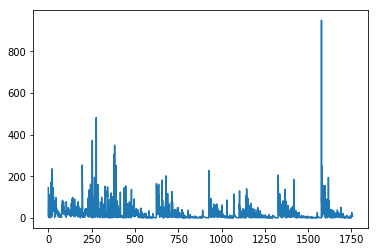

In [14]:
plt.plot(df['Link Clicks (e4)'])

In [15]:
idx =df.index[df['Link Clicks (e4)']>400]

In [16]:
idx.tolist()

[277, 1577]

In [17]:
df.drop(idx.tolist(), inplace= True)

### Time Spent per Visit (seconds)

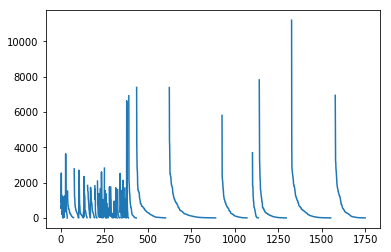

In [18]:
plt.plot(df['Time Spent per Visit (seconds)'])

In [19]:
idx =df.index[df['Time Spent per Visit (seconds)']>8000]
idx.tolist()

[1327]

In [20]:
df.drop(idx.tolist(), inplace= True)

### Average Time Spent on Page (seconds)

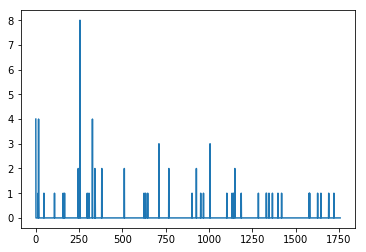

In [21]:
plt.plot(df['Link Clicks on TechSpecsTab'])

In [22]:
idx = df.index[df['Link Clicks on TechSpecsTab']>4]
idx.tolist()

[255]

In [23]:
df.drop(idx.tolist(), inplace = True)

### Link Clicks on ReviewTab

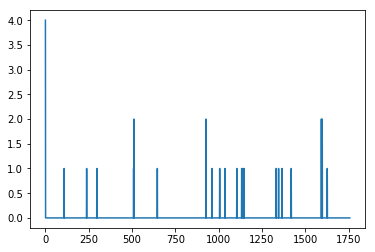

In [24]:
plt.plot(df['Link Clicks on ReviewTab'])

In [25]:
df[df['Link Clicks on ReviewTab']>2]

,MC1ID,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
0,50637eab03a94c59bb460e2e89adf021,0.0,0.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,663.333333,NaN,145.0,0.0,4.0,4.0,0.0,0.0,0.0


In [26]:
idx = df.index[df['Link Clicks on ReviewTab']>2]
df.drop(idx.tolist(), inplace = True)

### Link Clicks on FAQTab

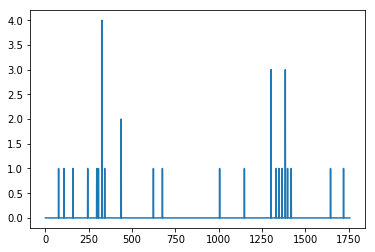

In [27]:
plt.plot(df['Link Clicks on FAQTab'])

In [28]:
idx = df.index[df['Link Clicks on FAQTab']>3]
df.drop(idx.tolist(), inplace=True)

### Link Clicks on AddtoCartButton

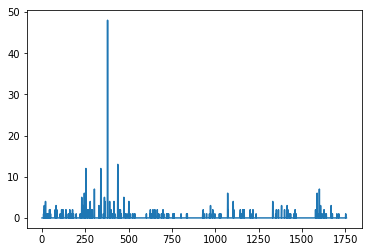

In [29]:
plt.plot(df['Link Clicks on AddtoCartButton'])

In [30]:
idx = df.index[df['Link Clicks on AddtoCartButton']>15]

In [31]:
idx.tolist()
df.drop(idx.tolist(), inplace=True)

### Count Plot

In [32]:
df.shape

(1751, 19)

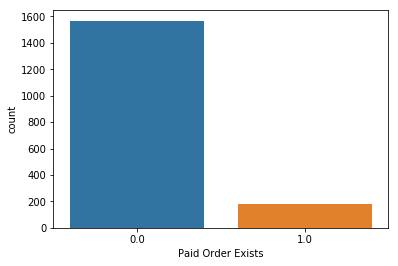

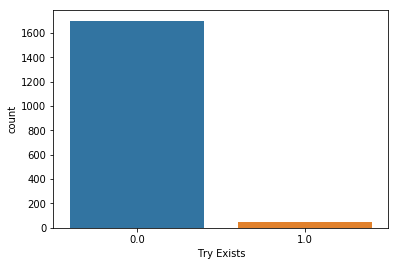

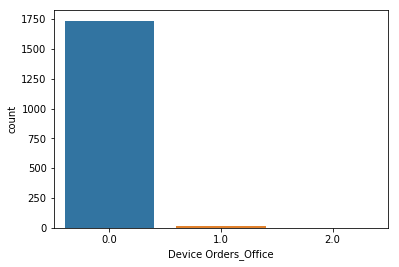

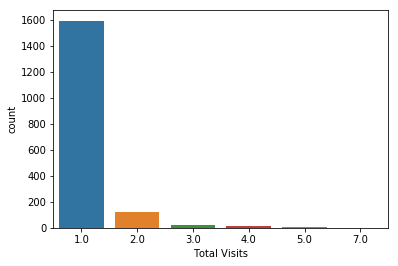

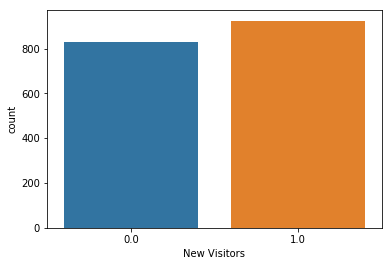

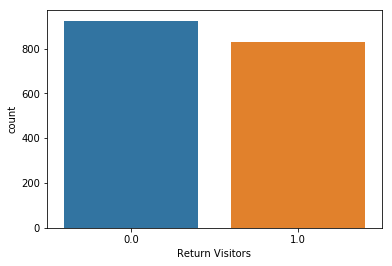

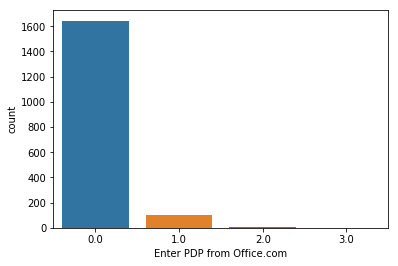

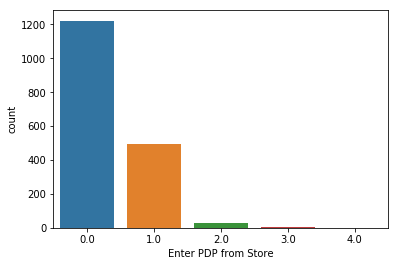

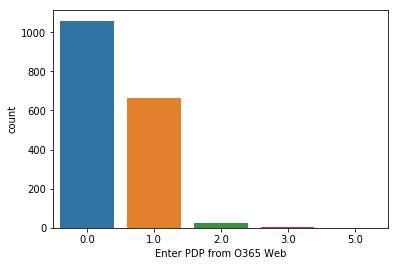

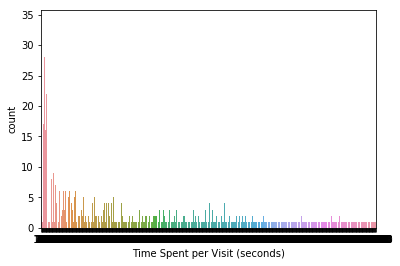

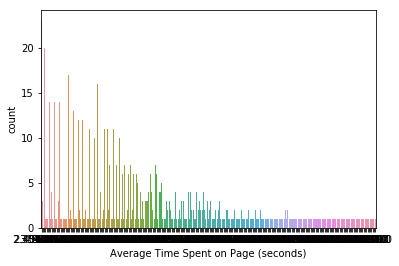

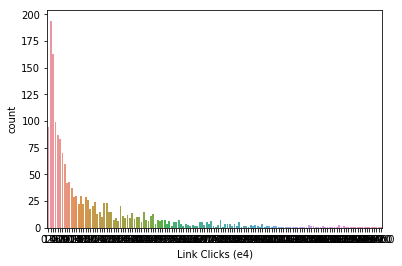

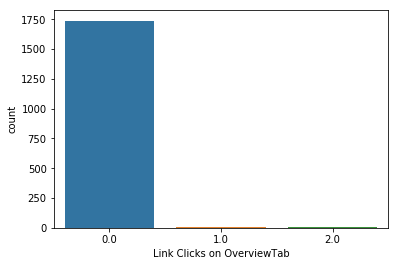

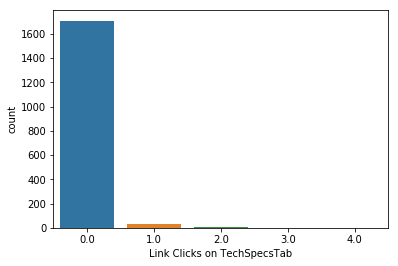

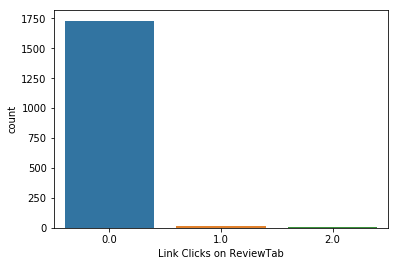

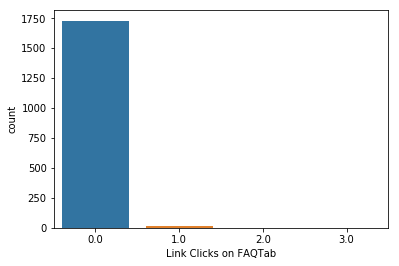

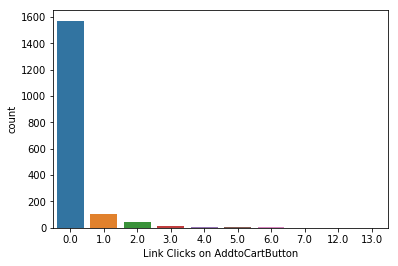

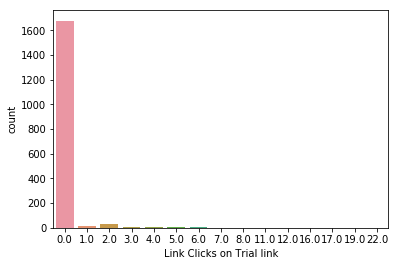

In [33]:
for c in range(1,19):
    sns.countplot(df.iloc[:,c])
    plt.show()

### Device Orders Office

In [34]:
df['Device Orders_Office'].value_counts()

0.0    1736
1.0      14
2.0       1
Name: Device Orders_Office, dtype: int64

In [35]:
idx = df.index[df['Device Orders_Office']==2]
df.drop(idx.tolist(), inplace=True)

### Total visits

In [36]:
df['Total Visits'].value_counts()

1.0    1591
2.0     118
3.0      22
4.0      14
5.0       4
7.0       1
Name: Total Visits, dtype: int64

In [37]:
idx = df.index[df['Total Visits']==7]
df.drop(idx.tolist(), inplace=True)

### Enter PDP from Office.com

In [38]:
df['Enter PDP from Office.com'].value_counts()

0.0    1642
1.0     103
2.0       3
3.0       1
Name: Enter PDP from Office.com, dtype: int64

In [39]:
idx = df.index[df['Enter PDP from Office.com']==3]
df.drop(idx.tolist(), inplace=True)

### Enter PDP from Store

In [40]:
df['Enter PDP from Store'].value_counts()

0.0    1219
1.0     497
2.0      27
3.0       4
4.0       1
Name: Enter PDP from Store, dtype: int64

In [41]:
idx = df.index[df['Enter PDP from Store']==4]
df.drop(idx.tolist(), inplace=True)

### Enter PDP from O365 Web

In [42]:
df['Enter PDP from O365 Web'].value_counts()

0.0    1055
1.0     664
2.0      22
3.0       5
5.0       1
Name: Enter PDP from O365 Web, dtype: int64

In [43]:
idx = df.index[df['Enter PDP from O365 Web']==5]
df.drop(idx.tolist(), inplace=True)

### Link Clicks on OverviewTab

In [44]:
df['Link Clicks on OverviewTab'].value_counts()

0.0    1733
1.0       9
2.0       4
Name: Link Clicks on OverviewTab, dtype: int64

### Link Clicks on TechSpecsTab

In [45]:
df['Link Clicks on TechSpecsTab'].value_counts()

0.0    1704
1.0      33
2.0       6
3.0       2
4.0       1
Name: Link Clicks on TechSpecsTab, dtype: int64

In [46]:
idx = df.index[df['Link Clicks on TechSpecsTab']==4]
df.drop(idx.tolist(), inplace=True)

### Link Clicks on ReviewTab

In [47]:
df['Link Clicks on ReviewTab'].value_counts()

0.0    1724
1.0      17
2.0       4
Name: Link Clicks on ReviewTab, dtype: int64

### Link Clicks on FAQTab

In [48]:
df['Link Clicks on FAQTab'].value_counts()

0.0    1724
1.0      18
3.0       2
2.0       1
Name: Link Clicks on FAQTab, dtype: int64

In [49]:
idx = df.index[df['Link Clicks on FAQTab']==2]
df.drop(idx.tolist(), inplace=True)

### Link Clicks on Trial link

In [50]:
df['Link Clicks on Trial link'].value_counts()

0.0     1672
2.0       27
1.0       12
3.0        8
4.0        8
6.0        4
5.0        3
8.0        2
22.0       2
7.0        1
16.0       1
19.0       1
11.0       1
12.0       1
17.0       1
Name: Link Clicks on Trial link, dtype: int64

In [51]:
idx = df.index[df['Link Clicks on Trial link']>9]
df.drop(idx.tolist(), inplace=True)

In [52]:
df.shape

(1737, 19)

In [53]:
df['Paid Order Exists'].value_counts()

0.0    1556
1.0     181
Name: Paid Order Exists, dtype: int64

In [54]:
df['Try Exists'].value_counts()

0.0    1687
1.0      50
Name: Try Exists, dtype: int64

In [55]:
df.columns

Index(['MC1ID', 'Paid Order Exists', 'Try Exists', 'Device Orders_Office',
       'Total Visits', 'New Visitors', 'Return Visitors',
       'Enter PDP from Office.com', 'Enter PDP from Store',
       'Enter PDP from O365 Web', 'Time Spent per Visit (seconds)',
       'Average Time Spent on Page (seconds)', 'Link Clicks (e4)',
       'Link Clicks on OverviewTab', 'Link Clicks on TechSpecsTab',
       'Link Clicks on ReviewTab', 'Link Clicks on FAQTab',
       'Link Clicks on AddtoCartButton', 'Link Clicks on Trial link'],
      dtype='object')

## Correlation among the features

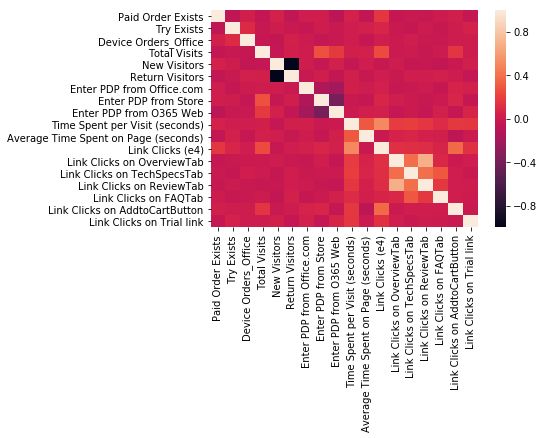

In [56]:
sns.heatmap(df.corr())

In [57]:
df_corr = df.corr()
df_corr.head()

,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
Paid Order Exists,1.000000,-0.058717,0.032479,-0.040794,0.051923,-0.051923,0.020821,0.028470,-0.077268,0.052971,-0.043049,0.157606,-0.027917,-0.012040,-0.022063,0.006563,0.038865,-0.030273
Try Exists,-0.058717,1.000000,0.100005,-0.023099,0.011656,-0.011656,-0.029216,0.012813,-0.010658,0.016682,0.039465,0.072096,-0.014091,-0.024572,0.007042,-0.016600,0.011430,0.052762
Device Orders_Office,0.032479,0.100005,1.000000,-0.024602,-0.043414,0.043414,0.003356,-0.031447,-0.009471,0.018634,-0.025955,0.016960,-0.007378,0.018434,-0.009464,-0.008691,0.011392,0.015424
Total Visits,-0.040794,-0.023099,-0.024602,1.000000,-0.034315,0.034315,0.012074,0.272573,0.179467,0.034207,0.044213,0.244472,-0.000071,0.006349,-0.018943,0.001556,0.150548,0.009008
New Visitors,0.051923,0.011656,-0.043414,-0.034315,1.000000,-1.000000,0.014711,-0.029540,0.040758,-0.036734,0.023183,-0.020634,0.010170,-0.027105,-0.018125,-0.045289,-0.013796,0.034923


In [58]:
df_corr.loc[(df_corr['Paid Order Exists']>0.05) | (df_corr['Paid Order Exists']<-0.05),'Paid Order Exists']

Paid Order Exists                 1.000000
Try Exists                       -0.058717
New Visitors                      0.051923
Return Visitors                  -0.051923
Enter PDP from O365 Web          -0.077268
Time Spent per Visit (seconds)    0.052971
Link Clicks (e4)                  0.157606
Name: Paid Order Exists, dtype: float64

In [59]:
( df_corr[(df_corr>0.05) | (df_corr<-0.05)])

,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
Paid Order Exists,1.000000,-0.058717,NaN,NaN,0.051923,-0.051923,NaN,NaN,-0.077268,0.052971,NaN,0.157606,NaN,NaN,NaN,NaN,NaN,NaN
Try Exists,-0.058717,1.000000,0.100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072096,NaN,NaN,NaN,NaN,NaN,0.052762
Device Orders_Office,NaN,0.100005,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Visits,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.272573,0.179467,NaN,NaN,0.244472,NaN,NaN,NaN,NaN,0.150548,NaN
New Visitors,0.051923,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Return Visitors,-0.051923,NaN,NaN,NaN,-1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enter PDP from Office.com,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.138887,-0.186277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059411,NaN
Enter PDP from Store,NaN,NaN,NaN,0.272573,NaN,NaN,-0.138887,1.000000,-0.393666,NaN,NaN,0.073428,NaN,NaN,NaN,NaN,0.072341,NaN
Enter PDP from O365 Web,-0.077268,NaN,NaN,0.179467,NaN,NaN,-0.186277,-0.393666,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063610
Time Spent per Visit (seconds),0.052971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.300154,0.505755,0.185557,0.189172,0.161257,0.107710,0.167867,0.161545


## Date Preparation from Buy+Try Rows

In [60]:
df[(df['Try Exists']==1) | (df['Paid Order Exists']==1)].shape

(231, 19)

In [61]:
df_buy_try = df[(df['Try Exists']==1) | (df['Paid Order Exists']==1)]
df_buy_try.head()

,MC1ID,Paid Order Exists,Try Exists,Device Orders_Office,Total Visits,New Visitors,Return Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on OverviewTab,Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
2,bb7e2062bd4142a194eaa8818bf04169,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1514.0,28.5,76.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c3d457532b31409da308173a867c96b5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,2544.0,21.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0bc59fdb65094105bb31a39094df49d4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,865.0,NaN,34.0,0.0,0.0,0.0,0.0,0.0,2.0
5,5f1827ae627a4bb79a221860eac95856,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,de1954cb3f34428999a3994f0b7d8ab9,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,229.0,NaN,10.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_buy_try.shape

(231, 19)

In [63]:
df_buy_try['Paid Order Exists'].value_counts()

1.0    181
0.0     50
Name: Paid Order Exists, dtype: int64

### Remove correlated columns before feature engineering

In [64]:
df_buy_try_temp = df_buy_try
df_buy_try_temp.shape

(231, 19)

In [65]:
df_buy_try_temp['Device Orders_Office'].value_counts()

0.0    225
1.0      6
Name: Device Orders_Office, dtype: int64

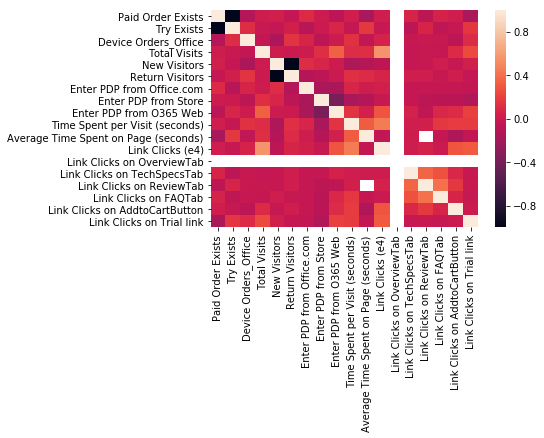

In [66]:
sns.heatmap(df_buy_try.corr())

In [67]:
## drop correlated cols
cols_to_drop=['MC1ID','Try Exists', 'Return Visitors','Link Clicks on OverviewTab']

df_buy_try_prep = df_buy_try.drop(cols_to_drop, axis=1)
df_buy_try_prep.head()

,Paid Order Exists,Device Orders_Office,Total Visits,New Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1514.0,28.5,76.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2544.0,21.0,114.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,865.0,NaN,34.0,0.0,0.0,0.0,0.0,2.0
5,0.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,229.0,NaN,10.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# drop categorical variables
cols_to_drop=['Paid Order Exists','Device Orders_Office', 'New Visitors']

df_buy_try_no_cat = df_buy_try_prep.drop(cols_to_drop, axis=1)
df_buy_try_no_cat.head()

,Total Visits,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
2,1.0,0.0,0.0,1.0,1514.0,28.5,76.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,2544.0,21.0,114.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,865.0,NaN,34.0,0.0,0.0,0.0,0.0,2.0
5,1.0,1.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,229.0,NaN,10.0,0.0,0.0,0.0,0.0,0.0


### Fill missing values with Mean

In [69]:
df_buy_try_no_cat.fillna(df_buy_try_no_cat.mean(), inplace=True)
df_buy_try_no_cat.head()

,Total Visits,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
2,1.0,0.0,0.0,1.0,1514.000000,28.500000,76.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,2544.000000,21.000000,114.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,865.000000,86.627104,34.0,0.0,0.0,0.0,0.0,2.0
5,1.0,1.0,0.0,0.0,561.410606,86.627104,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,1.0,0.0,229.000000,86.627104,10.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df_buy_try_no_cat.shape

(231, 12)

## Standard Scaler 

In [72]:
ss = StandardScaler()

np_buy_try_tranform = ss.fit_transform(df_buy_try_no_cat)

data = np_buy_try_tranform.tolist()
cols_transform = df_buy_try_no_cat.columns
df_buy_try_standard = pd.DataFrame(data,columns=cols_transform ) 
df_buy_try_standard.head()

,Total Visits,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link
0,-0.246532,-0.263523,-0.742172,1.355562,1.547934,-5.096758e-01,1.121995,-0.132745,-0.093454,-0.114708,-0.386565,-0.165074
1,-0.246532,-0.263523,-0.742172,-0.613840,3.221658,-5.754380e-01,2.201560,-0.132745,-0.093454,-0.114708,-0.386565,-0.165074
2,-0.246532,-0.263523,-0.742172,-0.613840,0.493325,1.246050e-16,-0.071209,-0.132745,-0.093454,-0.114708,-0.386565,3.012605
3,-0.246532,3.794733,-0.742172,-0.613840,0.000000,1.246050e-16,-1.008726,-0.132745,-0.093454,-0.114708,-0.386565,-0.165074
4,-0.246532,-0.263523,1.298801,-0.613840,-0.540159,1.246050e-16,-0.753039,-0.132745,-0.093454,-0.114708,-0.386565,-0.165074


In [73]:
df_buy_try_standard.shape

(231, 12)

## append categorocal back to scaler

In [78]:
# drop categorical variables
cols_to_drop=['Paid Order Exists','Device Orders_Office', 'New Visitors']

for c in cols_to_drop:
    df_buy_try_standard[c] = df_buy_try_prep[c]
df_buy_try_standard.head()

,Total Visits,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link,Paid Order Exists,Device Orders_Office,New Visitors
0,-0.246532,-0.263523,-0.742172,1.355562,1.547934,-5.096758e-01,1.121995,-0.132745,-0.093454,-0.114708,-0.386565,-0.165074,NaN,NaN,NaN
1,-0.246532,-0.263523,-0.742172,-0.613840,3.221658,-5.754380e-01,2.201560,-0.132745,-0.093454,-0.114708,-0.386565,-0.165074,NaN,NaN,NaN
2,-0.246532,-0.263523,-0.742172,-0.613840,0.493325,1.246050e-16,-0.071209,-0.132745,-0.093454,-0.114708,-0.386565,3.012605,1.0,1.0,0.0
3,-0.246532,3.794733,-0.742172,-0.613840,0.000000,1.246050e-16,-1.008726,-0.132745,-0.093454,-0.114708,-0.386565,-0.165074,1.0,1.0,0.0
4,-0.246532,-0.263523,1.298801,-0.613840,-0.540159,1.246050e-16,-0.753039,-0.132745,-0.093454,-0.114708,-0.386565,-0.165074,1.0,1.0,0.0


In [83]:
df_buy_try_standard.fillna(0, inplace=True)
df_buy_try_standard.head()

,Total Visits,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link,Paid Order Exists,Device Orders_Office,New Visitors
0,-0.246532,-0.263523,-0.742172,1.355562,1.547934,-5.096758e-01,1.121995,-0.132745,-0.093454,-0.114708,-0.386565,-0.165074,0.0,0.0,0.0
1,-0.246532,-0.263523,-0.742172,-0.613840,3.221658,-5.754380e-01,2.201560,-0.132745,-0.093454,-0.114708,-0.386565,-0.165074,0.0,0.0,0.0
2,-0.246532,-0.263523,-0.742172,-0.613840,0.493325,1.246050e-16,-0.071209,-0.132745,-0.093454,-0.114708,-0.386565,3.012605,1.0,1.0,0.0
3,-0.246532,3.794733,-0.742172,-0.613840,0.000000,1.246050e-16,-1.008726,-0.132745,-0.093454,-0.114708,-0.386565,-0.165074,1.0,1.0,0.0
4,-0.246532,-0.263523,1.298801,-0.613840,-0.540159,1.246050e-16,-0.753039,-0.132745,-0.093454,-0.114708,-0.386565,-0.165074,1.0,1.0,0.0


In [84]:
df_buy_try_standard.shape

(231, 15)

## Buy + Try PCA

Text(0, 0.5, 'cumulative explained variance')

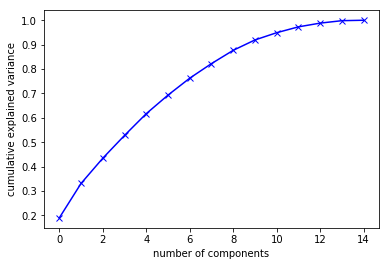

In [85]:
pca = PCA().fit(df_buy_try_standard)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bx-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

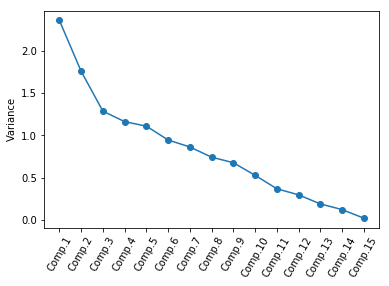

In [86]:
# https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html#deciding-how-many-principal-components-to-retain

def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, df_buy_try_standard)


In [80]:
## as per Kaiser's rule take comp where variance >1 so 5 components

In [76]:
pca.components_[0]

array([ 0.40948819, -0.01076582, -0.19914255,  0.39608104,  0.38964301,
        0.07716378,  0.52002791,  0.08655943,  0.10762878,  0.13339426,
        0.25662364,  0.32362696])

In [88]:
pca5= PCA(n_components=5)
pca5.fit(df_buy_try_standard)
df_pca5 = pca5.transform(df_buy_try_standard)
df_pca5

array([[ 1.63392148e+00, -2.35409747e-01, -7.83334367e-01,
        -4.01844613e-01, -2.02860285e-01],
       [ 2.05552551e+00, -1.84801451e-01, -4.31420533e-01,
         1.47480663e+00, -4.70708271e-01],
       [ 8.30726455e-01, -5.09433225e-01, -5.91033497e-01,
        -3.91566417e-01,  1.14951123e-01],
       ...,
       [-1.05176784e+00, -6.87817215e-04, -4.50838059e-01,
        -5.37928616e-01,  1.32993086e-01],
       [-1.06647874e+00,  3.01278363e-03, -4.57423230e-01,
        -5.43227339e-01,  1.36875662e-01],
       [-1.05738844e+00, -1.35012767e-03, -4.47747424e-01,
        -5.43800041e-01,  1.32287092e-01]])

In [89]:
len(df_pca5)

231

## Buy + Try Elbow 1

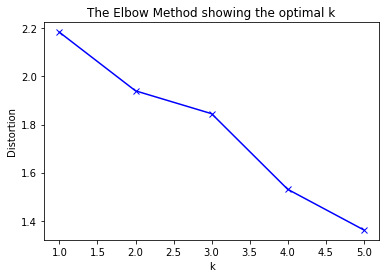

In [90]:
from sklearn import metrics
from scipy.spatial.distance import cdist

K = range(1,6)
distortions= []
for k in K:
    kmeansModel = KMeans(k)
    kmeansModel.fit(df_pca5)
    distortions.append(sum(np.min(cdist(df_pca5, kmeansModel.cluster_centers_, 'euclidean'), axis=1)) / df_pca5.shape[0])

    # Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [88]:
### K =4

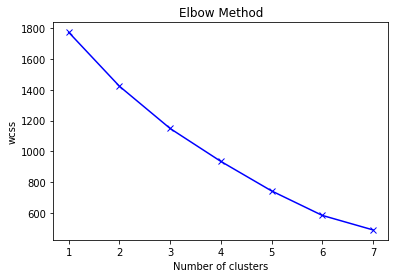

In [91]:
wcss = []
for i in range(1,8):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_pca5)
    wcss.append(km.inertia_)
plt.plot(range(1,8),wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

## KMeans clustering

In [92]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(n_clusters=nclust,init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    print (model.inertia_, model.score)
    return (clust_labels, cent)

#k=7
clust_labels2, cent2 = doKmeans(df_pca5, 2)
clust_labels3, cent3 = doKmeans(df_pca5, 3)
clust_labels4, cent4 = doKmeans(df_pca5, 4)
clust_labels5, cent5 = doKmeans(df_pca5, 5)
clust_labels6, cent6 = doKmeans(df_pca5, 6)
#clust_labels7, cent7 = doKmeans(df_pca, 7)
#clust_labels8, cent8 = doKmeans(df_pca, 8)

kmeans2 = pd.DataFrame(clust_labels2)
kmeans3 = pd.DataFrame(clust_labels3)
kmeans4 = pd.DataFrame(clust_labels4)
kmeans5 = pd.DataFrame(clust_labels5)
kmeans6 = pd.DataFrame(clust_labels6)



1423.0019241952505 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>
1149.187448742438 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>
935.839926535454 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>
744.6775209770544 <bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)>
585.9491346579284 <bound method KMeans.score of KMeans(algorithm='au

In [94]:
df_kmeans_result= pd.DataFrame(df_pca5, columns=df_buy_try_standard.columns[:5])
df_kmeans_result['cluster2'] = kmeans2
df_kmeans_result['cluster3'] = kmeans3
df_kmeans_result['cluster4'] = kmeans4
df_kmeans_result['cluster5'] = kmeans5
df_kmeans_result['cluster6'] = kmeans6

df_kmeans_result.head()

,Total Visits,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),cluster2,cluster3,cluster4,cluster5,cluster6
0,1.633921,-0.235410,-0.783334,-0.401845,-0.202860,1,0,3,0,1
1,2.055526,-0.184801,-0.431421,1.474807,-0.470708,1,0,3,3,2
2,0.830726,-0.509433,-0.591033,-0.391566,0.114951,0,0,3,0,1
3,-0.921005,0.002209,-2.018601,1.983889,-1.516292,0,0,3,3,2
4,-1.344177,-0.234122,0.893364,0.172013,0.523704,0,0,0,4,5


In [95]:
df_kmeans_result.shape

(231, 10)

In [98]:
cent4

array([[-0.93641385, -0.13689433,  0.54634521,  0.07647252,  0.14188013],
       [ 4.16768866, -1.48992837,  1.45013342, -0.16514663,  0.24012878],
       [ 1.89703844,  6.08339842,  0.65678939, -0.17166481,  0.60805943],
       [ 0.37958614, -0.06296782, -0.92346413, -0.05558561, -0.25194141]])

In [89]:
df_centroid2 = pd.DataFrame(cent2, columns=df_buy_try_standard.columns[:7]) 
df_centroid2.head()

,Total Visits,New Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds)
0,-0.688741,-0.097387,-0.001687,-0.169158,0.013728,-0.066974,-0.000565
1,2.007855,0.283909,0.004919,0.493137,-0.040022,0.195246,0.001647


In [95]:
df_centroid2.to_csv("df_centroid2.csv")

PermissionError: [Errno 13] Permission denied: 'df_centroid2.csv'

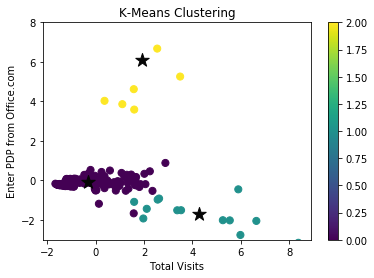

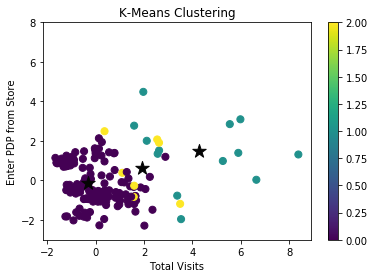

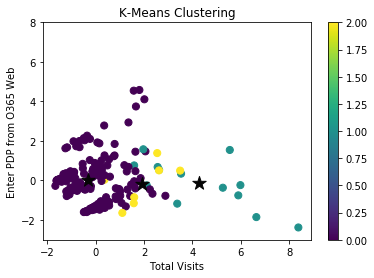

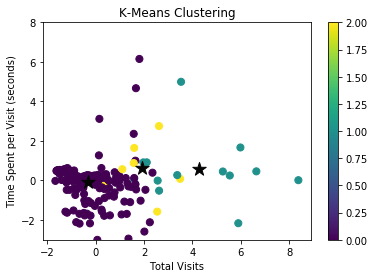

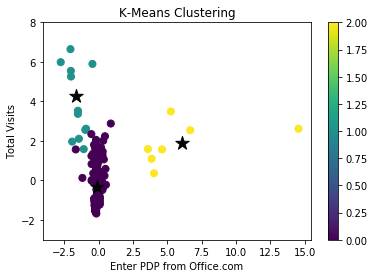

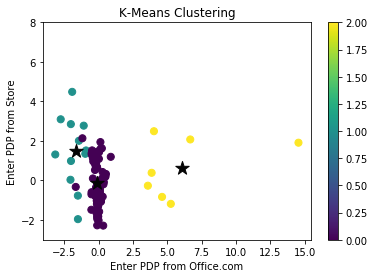

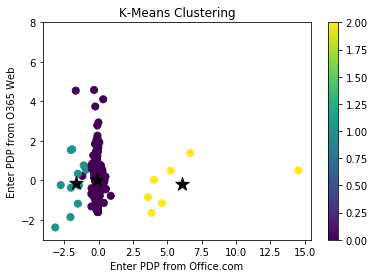

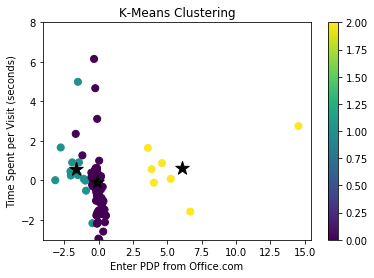

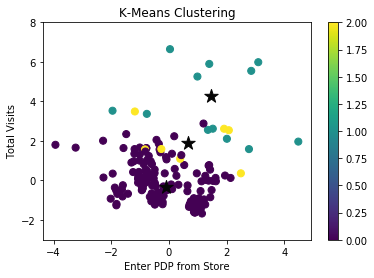

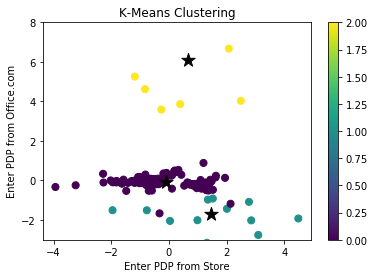

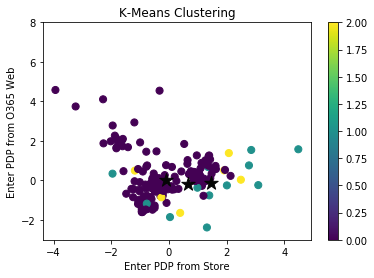

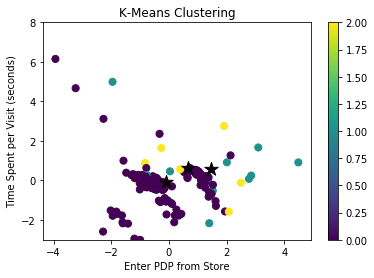

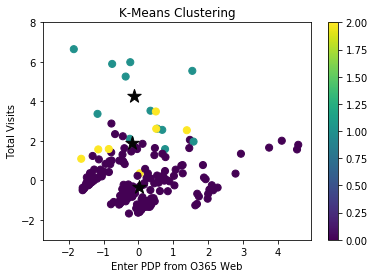

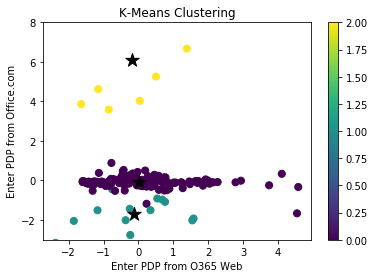

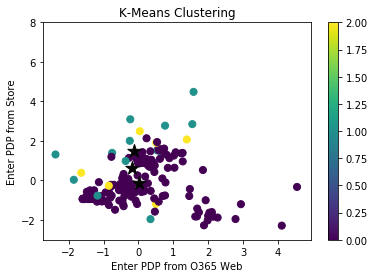

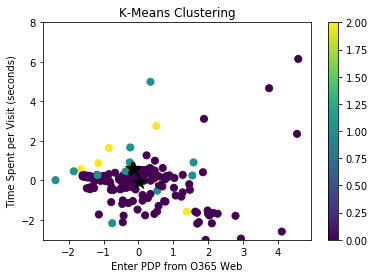

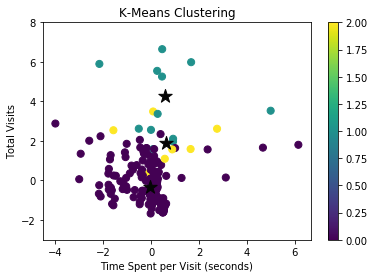

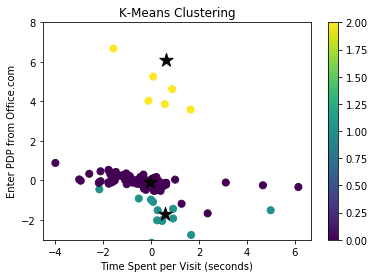

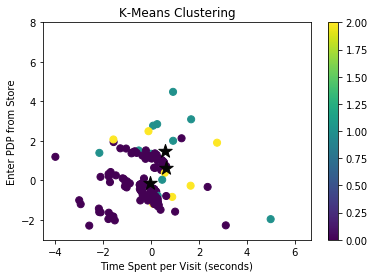

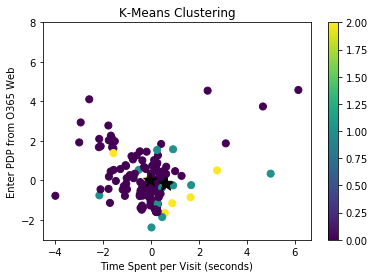

In [100]:
cols = df_kmeans_result.columns

#group = ("Paid Order", "Trial Order")

# plot from PCA
for cc in range(0,5):
    for r in range(0,5):
        if cc == r:
            continue
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(df_kmeans_result.iloc[:,cc],df_kmeans_result.iloc[:,r],
                     c=df_kmeans_result['cluster3'],s=50)
        plt.ylim(-2, 20)
        ax.set_title('K-Means Clustering')
        ax.set_xlabel(cols[cc])
        ax.set_ylabel(cols[r])
        plt.colorbar(scatter)
        plt.scatter(cent3[:, cc], cent3[:,r], marker='*', s=200, c='#050505')
        plt.ylim(-3,8)
        

In [98]:
len(kmeans2)

231

In [99]:
df_buy_try.shape

(231, 14)

In [100]:
df_buy_try['cluster2'] = kmeans2
df_buy_try.head()

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Device Orders_Office,Total Visits,New Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link,cluster2
2,1.0,1.0,0.0,0.0,0.0,1.0,1514.000000,28.500000,76.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,2544.000000,21.000000,114.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,865.000000,86.627104,34.0,0.0,0.0,0.0,0.0,2.0,0.0
5,1.0,1.0,1.0,1.0,0.0,0.0,561.410606,86.627104,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1.0,1.0,0.0,0.0,1.0,0.0,229.000000,86.627104,10.0,0.0,0.0,0.0,0.0,0.0,1.0


In [101]:
df_buy_try.index[df_buy_try['cluster2'].isna()]

Int64Index([231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242], dtype='int64')

In [102]:
df_buy_try.drop(df_buy_try.index[df_buy_try['cluster2'].isna()], inplace=True)

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [103]:
df_buy_try['cluster2'].value_counts()

0.0    177
1.0     42
Name: cluster2, dtype: int64

In [104]:
df_buy_try['cluster2_corrected'] = df_buy_try['cluster2'].apply(lambda x: 1 if x==0 else 0)
df_buy_try.head()

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Device Orders_Office,Total Visits,New Visitors,Enter PDP from Office.com,Enter PDP from Store,Enter PDP from O365 Web,Time Spent per Visit (seconds),Average Time Spent on Page (seconds),Link Clicks (e4),Link Clicks on TechSpecsTab,Link Clicks on ReviewTab,Link Clicks on FAQTab,Link Clicks on AddtoCartButton,Link Clicks on Trial link,cluster2,cluster2_corrected
2,1.0,1.0,0.0,0.0,0.0,1.0,1514.000000,28.500000,76.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,1.0,1.0,0.0,0.0,0.0,0.0,2544.000000,21.000000,114.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,1.0,0.0,0.0,0.0,0.0,865.000000,86.627104,34.0,0.0,0.0,0.0,0.0,2.0,0.0,1
5,1.0,1.0,1.0,1.0,0.0,0.0,561.410606,86.627104,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6,1.0,1.0,0.0,0.0,1.0,0.0,229.000000,86.627104,10.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [105]:
y_hat = df[(df['Try Exists']==1) | (df['Paid Order Exists']==1)]['Paid Order Exists']
y_hat = y_hat[:219]

In [115]:
df_buy_try[df_buy_try['cluster2']==1].mean()

Device Orders_Office                      0.095238
Total Visits                              1.071429
New Visitors                              0.476190
Enter PDP from Office.com                 0.047619
Enter PDP from Store                      0.476190
Enter PDP from O365 Web                   0.309524
Time Spent per Visit (seconds)          412.362951
Average Time Spent on Page (seconds)     73.862614
Link Clicks (e4)                         27.023810
Link Clicks on TechSpecsTab               0.000000
Link Clicks on ReviewTab                  0.000000
Link Clicks on FAQTab                     0.023810
Link Clicks on AddtoCartButton            0.142857
Link Clicks on Trial link                 0.023810
cluster2                                  1.000000
cluster2_corrected                        0.000000
dtype: float64

In [117]:
df_buy_mean = pd.DataFrame(df_buy_try[df_buy_try['cluster2']==0].mean())
df_buy_mean

,0
Device Orders_Office,0.011299
Total Visits,1.067797
New Visitors,0.661017
Enter PDP from Office.com,0.073446
Enter PDP from Store,0.361582
Enter PDP from O365 Web,0.316384
Time Spent per Visit (seconds),597.014724
Average Time Spent on Page (seconds),82.694844
Link Clicks (e4),38.841808
Link Clicks on TechSpecsTab,0.022599


In [118]:
df_buy_mean.to_csv("df_buy_mean.csv")

In [119]:
df_try_mean = pd.DataFrame(df_buy_try[df_buy_try['cluster2']==1].mean())
df_try_mean
df_try_mean.to_csv("df_try_mean.csv")

In [111]:
df_buy_try[df_buy_try['cluster2_corrected']==1].agg( lambda x:x.value_counts().index[0])

Device Orders_Office                      0.000000
Total Visits                              1.000000
New Visitors                              1.000000
Enter PDP from Office.com                 0.000000
Enter PDP from Store                      0.000000
Enter PDP from O365 Web                   0.000000
Time Spent per Visit (seconds)          561.410606
Average Time Spent on Page (seconds)     86.627104
Link Clicks (e4)                         31.000000
Link Clicks on TechSpecsTab               0.000000
Link Clicks on ReviewTab                  0.000000
Link Clicks on FAQTab                     0.000000
Link Clicks on AddtoCartButton            0.000000
Link Clicks on Trial link                 0.000000
cluster2                                  0.000000
cluster2_corrected                        1.000000
dtype: float64

In [ ]:
len(df_buy_try['cluster2_corrected'])

In [ ]:
print (metrics.classification_report(y_hat, df_buy_try['cluster2_corrected']))

In [ ]:
print (metrics.confusion_matrix(y_hat, df_buy_try['cluster2_corrected']))

##  Agglomertive

In [ ]:
df_standard_transform.drop(['agglomerative'], axis= 1, inplace=True)

In [ ]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    print (model.affinity, model.connectivity)
    return (clust_labels1)

clust_labels2 = doAgglomerative(df_pca7, 2)
clust_labels3 = doAgglomerative(df_pca7, 3)
clust_labels4 = doAgglomerative(df_pca7, 4)

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df_pca6, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

In [ ]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

In [ ]:
agglomerative = pd.DataFrame(clust_labels2)
df_buy_try.insert((df_buy_try.shape[1]),'agglomerative2',agglomerative)
df_buy_try.head()

df_buy_try['agglomerative2'].value_counts()

In [ ]:
df_buy_try['agglomerative2_corrected'] = df_buy_try['agglomerative2'].apply(lambda x: 1 if x ==0 else 0)
print (metrics.confusion_matrix(y_hat, df_buy_try['agglomerative2_corrected']))

In [ ]:
print (metrics.classification_report(y_hat, df_buy_try['agglomerative2_corrected']))

In [ ]:
df_agglomerative_result= pd.DataFrame(df_pca7, columns=df_buy_try_standard.columns[:7])
df_agglomerative_result['cluster2'] = clust_labels2
df_agglomerative_result['cluster3'] = clust_labels3
df_agglomerative_result['cluster4'] = clust_labels4

df_agglomerative_result.head()

In [ ]:
cols = df_agglomerative_result.columns

# plot from PCA
for cc in range(0,7):
  for r in range(0,7):
        if cc == r:
            continue
        fig = plt.figure()
        ax = fig.add_subplot(111)
        scatter = ax.scatter(df_agglomerative_result.iloc[:,cc],df_agglomerative_result.iloc[:,r],
                     c=df_agglomerative_result['cluster2'],s=50)
        plt.ylim(-2, 20)
        ax.set_title('Agglomerative Clustering')
        ax.set_xlabel(cols[cc])
        ax.set_ylabel(cols[r])
        plt.colorbar(scatter)
        plt.ylim(-3,8)

In [ ]:
df_buy_try.head()